# EDA for Marriageability Project

PURPOSE: The TEAM used this notebook to 1) combine the ACS_household and ACS_person datafiles and 2) to perform EDA.

In [1]:
#Importing Python packages
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib as mpl
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
mpl.style.use('seaborn-white')
from cycler import cycler
from matplotlib.pyplot import figure
from matplotlib.pyplot import NullFormatter
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore")

In [2]:
#setting visual preferences
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [3]:
#Importing and Merging Household file with the Person File by 'SERIALNO'
ACSmarry = pd.read_csv('data/ACSmarry_v2.csv', sep=',', header=0, skipinitialspace=True)
ACShouse = pd.read_csv('data/ACShousehold.csv', sep=',', header=0, skipinitialspace=True)

In [4]:
#How many households are in common between ACSmarry and ACShouse
ACSmarry['SERIALNO'].isin(ACShouse['SERIALNO']).value_counts()

True    2530726
Name: SERIALNO, dtype: int64

In [5]:
ACSmarry.shape

(2530726, 73)

In [6]:
ACShouse.shape

(1524620, 12)

In [7]:
ACShouse.dtypes

Unnamed: 0                int64
RT                       object
SERIALNO                  int64
TYPE                      int64
marital_status_house    float64
FACCESSP                float64
FBROADBNDP              float64
FSMARTPHONP             float64
FVEHP                   float64
family                  float64
multigen                float64
language                float64
dtype: object

In [8]:
#Inner Merge/Join to create ACSproject
ACSeda = pd.merge(ACSmarry,
                     ACShouse, on='SERIALNO')
ACSeda.shape

(2530726, 84)

# Exploring Household Variables

In [9]:
House = ACSeda.filter(items=[ 'TYPE', 'marital_status_house','family','multigen','language'])
House.describe()

,TYPE,marital_status_house,family,multigen,language
count,2.530726e+06,2.385595e+06,1.874712e+06,2.385595e+06,2.385595e+06
mean,1.088089e+00,6.241914e-01,4.037692e-01,6.847977e-02,1.329281e+00
std,3.765795e-01,4.963042e-01,4.906524e-01,2.525675e-01,6.534280e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
max,3.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00


In [10]:
#Checking for missing values (NaN)
House['family'].value_counts(dropna=False)

0.0    1117761
1.0     756951
NaN     656014
Name: family, dtype: int64

In [11]:
pd.crosstab(House.family, House.TYPE, margins=True, dropna=False)

TYPE,1,2,3,All
family,,,,
0.0,1117761,0,0,1117761
1.0,756951,0,0,756951
All,2385595,67333,77798,2530726


In [12]:
#Setting the missing (naN) to 0.  Per ACS documentation, these cases are missing because they do not apply
ACSeda['FAMILY'] = ACSeda['family']
ACSeda.loc[(ACSeda.multigen != 1), 'FAMILY'] = 0

ACSeda['FAMILY'].value_counts(dropna=False)

0.0    2395655
1.0     135071
Name: FAMILY, dtype: int64

In [13]:
stack_family = pd.crosstab(ACSeda.FAMILY, ACSeda.MARRIED)

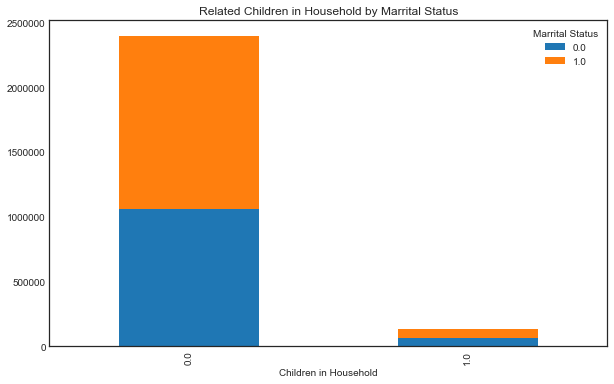

In [14]:
stack_family.plot.bar(stacked=True)
plt.legend(title="Marrital Status")
plt.title('Related Children in Household by Marrital Status')
plt.xlabel('Children in Household')

fig = plt.gcf()
fig.set_size_inches(10,6)

plt.show()

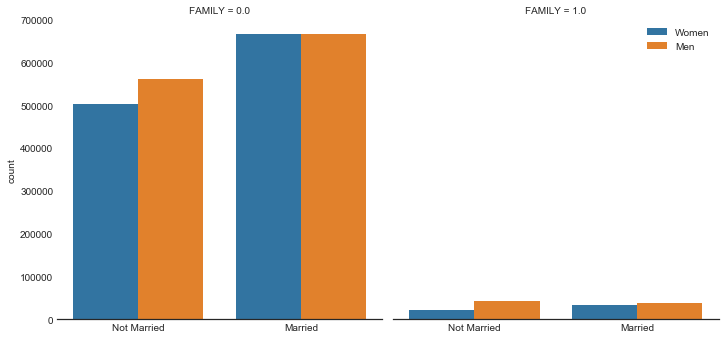

In [15]:
g=sns.catplot('MARRIED', col='FAMILY', hue='SEX',\
             data=ACSeda, kind='count', legend=False)

g.set_axis_labels('', 'count')

g.set_xticklabels(['Not Married', 'Married']).despine(left=True)

plt.legend(labels=['Women', 'Men'])

In [16]:
#Checking for missing values (NaN)
House['multigen'].value_counts(dropna=False)

0.0    2222230
1.0     163365
NaN     145131
Name: multigen, dtype: int64

In [17]:
#Setting the missing (naN) to 0
ACSeda['MULTIGEN'] = ACSeda['multigen']
ACSeda.loc[(ACSeda.multigen != 1), 'MULTIGEN'] = 0

ACSeda['MULTIGEN'].value_counts(dropna=False)

0.0    2367361
1.0     163365
Name: MULTIGEN, dtype: int64

In [18]:
#Checking for missing values (NaN)
House['language'].value_counts(dropna=False)

1.0    1845915
2.0     293829
3.0     245851
NaN     145131
Name: language, dtype: int64

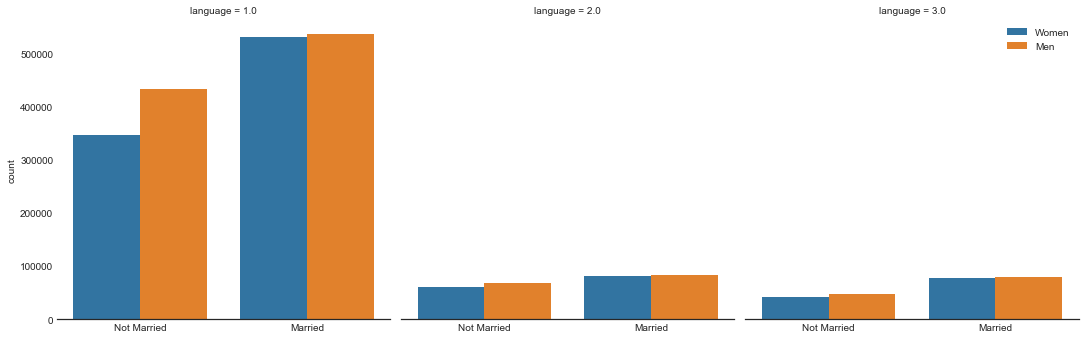

In [19]:
g=sns.catplot('MARRIED', col='language', hue='SEX',\
             data=ACSeda, kind='count', legend=False)

g.set_axis_labels('', 'count')

g.set_xticklabels(['Not Married', 'Married']).despine(left=True)

plt.legend(labels=['Women', 'Men'])

In [20]:
#CDeriving new variable (ENGLISH) where 1 = English and 0 = another language
ACSeda['ENGLISH'] = ACSeda['language']
ACSeda.loc[(ACSeda.language != 1), 'ENGLISH'] = 0

ACSeda['ENGLISH'].value_counts(dropna=False)

1.0    1845915
0.0     684811
Name: ENGLISH, dtype: int64

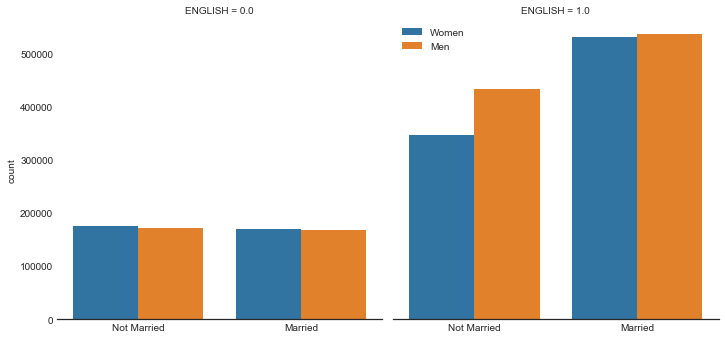

In [21]:
g=sns.catplot('MARRIED', col='ENGLISH', hue='SEX',\
             data=ACSeda, kind='count', legend=False)

g.set_axis_labels('', 'count')

g.set_xticklabels(['Not Married', 'Married']).despine(left=True)

plt.legend(labels=['Women', 'Men'])

In [22]:
Housex = ACSeda.filter(items=['FAMILY','MULTIGEN','ENGLISH'])

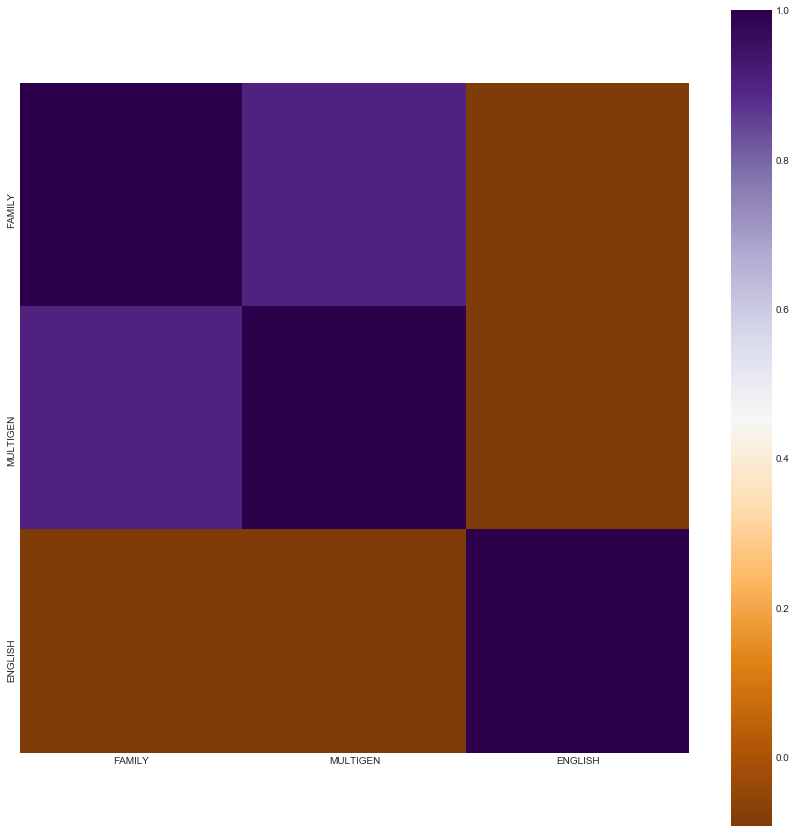

In [23]:
#Correlation Matrix
f, ax = plt.subplots(figsize=(15, 15))
corr = Housex.corr()
sns.heatmap(corr,  cmap='PuOr',
            square=True, ax=ax)

# Occupation by Marriage

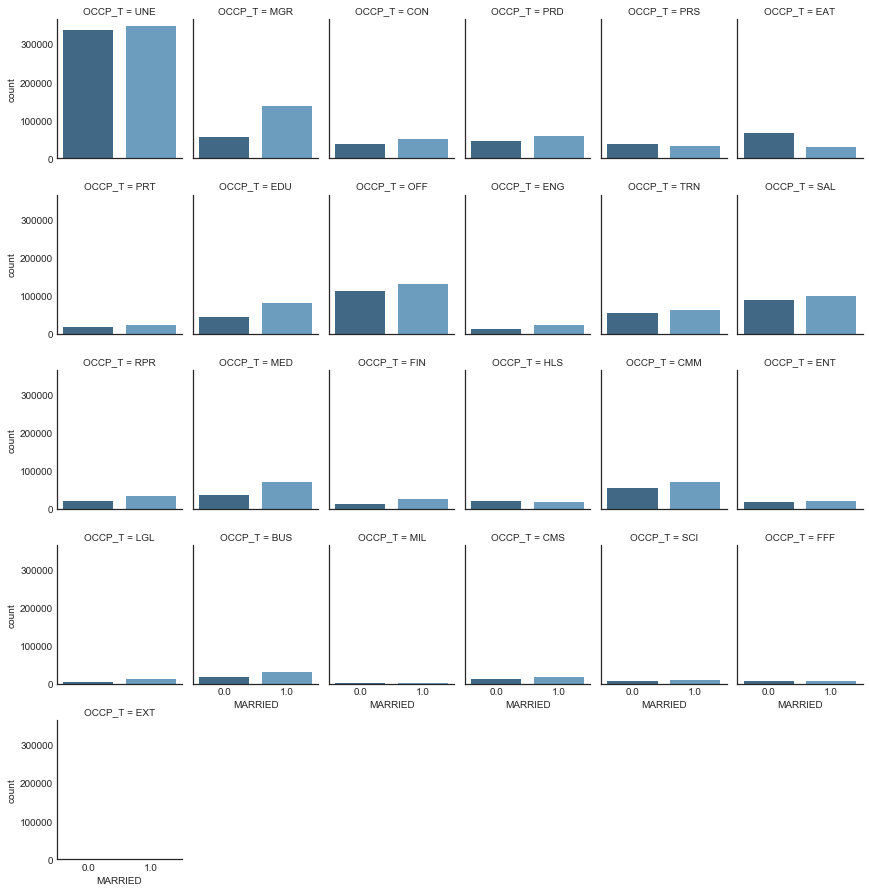

In [24]:
g = sns.catplot('MARRIED', col='OCCP_T', col_wrap=6,\
                data=ACSeda, kind='count',\
                height=2.5, aspect=.8, palette='Blues_d')

One-hot encoding Occupation Variables

In [25]:
#Dummy encoding of OCCP_T (Occupation), dropping UNE
ACSeda['OCCP_T'].value_counts(sort=True, dropna=False)

UNE    685662
OFF    243886
MGR    194303
SAL    185798
CMM    123948
EDU    121802
TRN    117185
MED    108244
PRD    105448
EAT     96479
CON     87872
PRS     70404
RPR     54789
BUS     49892
FIN     40825
ENT     39751
HLS     38648
PRT     38045
ENG     33907
CMS     32991
LGL     20646
SCI     16872
FFF     14862
MIL      6168
EXT      2299
Name: OCCP_T, dtype: int64

In [26]:
%matplotlib inline

In [27]:
ACSeda = pd.get_dummies(ACSeda, columns=['OCCP_T'], prefix='OCC', drop_first=False) #Will drop ESR for the ML models

# Exploring and Binning AGEP 

In [28]:
ACSeda['AGEP'].describe().astype('int64')

count    2530726
mean          49
std           18
min           18
25%           34
50%           50
75%           64
max           96
Name: AGEP, dtype: int64

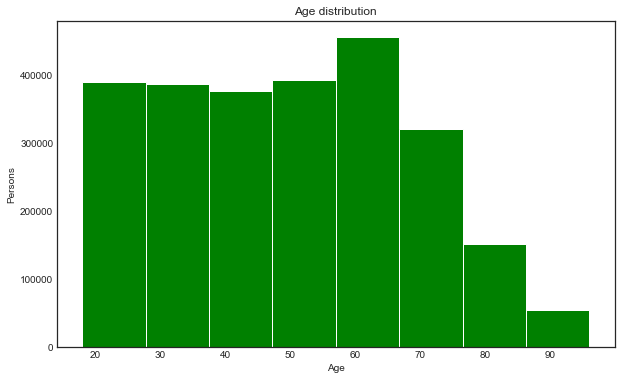

In [29]:
#Plotting Age
plt.hist(ACSeda['AGEP'], facecolor='green', edgecolor='white', bins = 8)
         
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Persons')

fig = plt.gcf()
fig.set_size_inches(10,6)

plt.show()

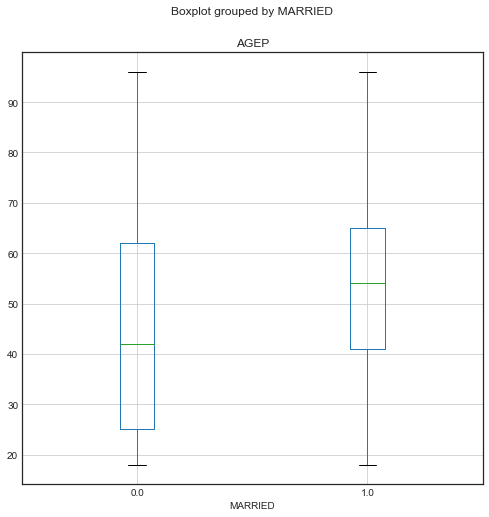

In [30]:
ACSeda.boxplot(column='AGEP', by='MARRIED', figsize= (8,8))

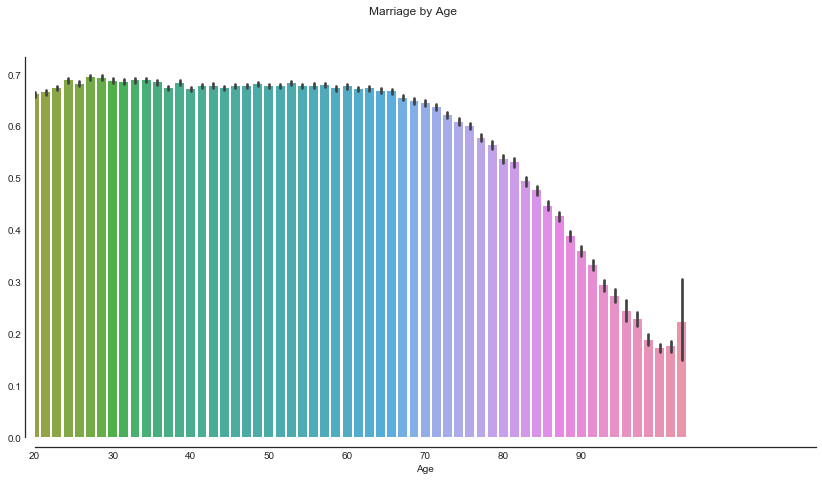

In [31]:
#Plotting distribution of marriage outcomes by age
a4_dims = (14, 7)
fig, ax = plt.subplots(figsize=a4_dims)
age1 = sns.barplot(x='AGEP', y='MARRIED', data=ACSeda, ax=ax)
ax.set_xlabel('Age')
ax.set_ylabel('')
ax.set_xticks(np.arange(20, 90, step=7))
ax.set_xticklabels(['20', '30', '40', '50', '60', '70', '80', '90'], rotation=45)
ax.set_xlim(20, 90)
ax.grid(False)
fig.suptitle('Marriage by Age')
sns.despine(offset=10, trim=False)

Creating BINS for AGE

In [32]:
ACSeda['AGE_BIN'] = pd.cut(x=ACSeda['AGEP'], bins=[17, 29, 39, 49, 59, 69, 99], labels=['1', '2', '3', '4', '5', '6'])

In [33]:
ACSeda['AGE_BIN'].value_counts(sort=True, dropna=False) 

1    466506
4    456923
5    431875
6    408068
2    384516
3    382838
Name: AGE_BIN, dtype: int64

In [34]:
ACSeda['AGE_BINx'] = pd.cut(x=ACSeda['AGEP'], bins=[17, 29, 39, 49, 59, 69, 99], labels=['18-20s', '30s', '40s', '50s', '60s', '70s+'])

In [35]:
pd.crosstab(ACSeda.AGE_BINx, ACSeda.MARRIED, margins=True, dropna=False)

MARRIED,0.0,1.0,All
AGE_BINx,,,
18-20s,379616,86890,466506
30s,153747,230769,384516
40s,120028,262810,382838
50s,147536,309387,456923
60s,139859,292016,431875
70s+,185296,222772,408068
All,1126082,1404644,2530726


In [36]:
stack_age = pd.crosstab(ACSeda.AGE_BINx, ACSeda.MARRIED)

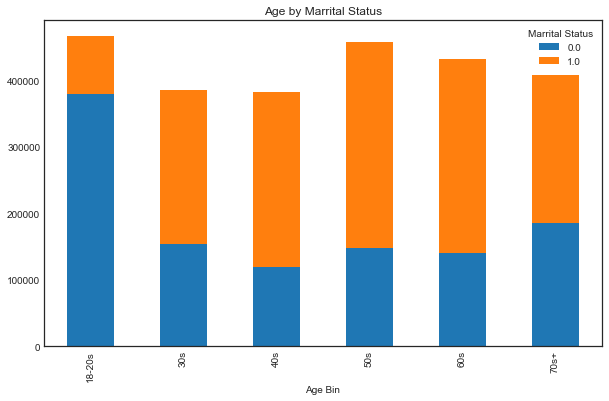

In [37]:
stack_age.plot.bar(stacked=True)
plt.legend(title="Marrital Status")
plt.title('Age by Marrital Status')
plt.xlabel('Age Bin')

fig = plt.gcf()
fig.set_size_inches(10,6)

plt.show()

# Married by Age and Gender

(10, 100)

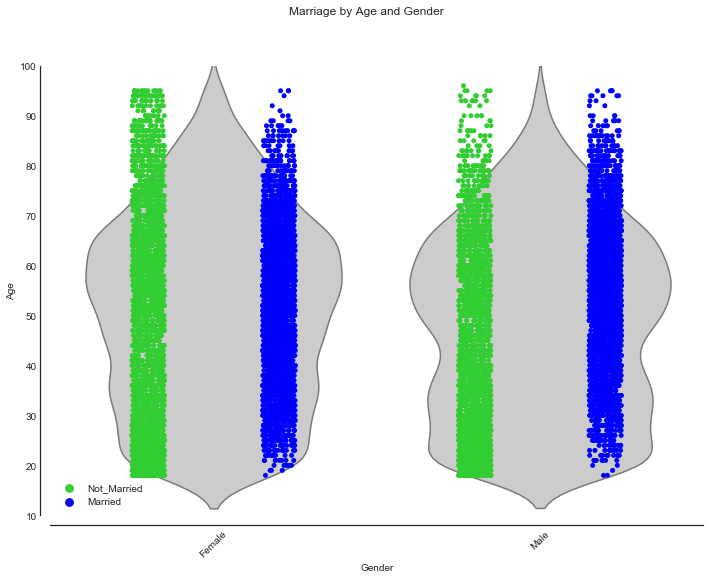

In [38]:
mpl.rcParams['axes.prop_cycle'] = cycler('color', ['limegreen', 'blue', 'turquoise'])
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
inc_1 = sns.violinplot(x="SEX_T", y="AGEP", data=ACSeda.sample(12000), inner=None, color=".8")
inc_1 = sns.stripplot(x='SEX_T', y='AGEP', hue='MARRIED', data=ACSeda.sample(12000), jitter=True, split=True, dodge=True, ax=ax)
fig.suptitle('Marriage by Age and Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Age')
handles, labels = ax.get_legend_handles_labels()
labels2 = ('Not_Married', 'Married')
ax.legend(handles, labels2)
sns.despine(offset=10, trim=False)
ax.grid(False)
ax.set_xticklabels(['Female', 'Male'], rotation=45)
ax.set_ylim(10, 100)

# Exploring and Binning INCOME

In [39]:
ACSeda['INCOME'].describe().astype('int64')

count    2530726
mean       43205
std        62816
min            0
25%         9950
50%        26290
75%        53593
max      1580488
Name: INCOME, dtype: int64

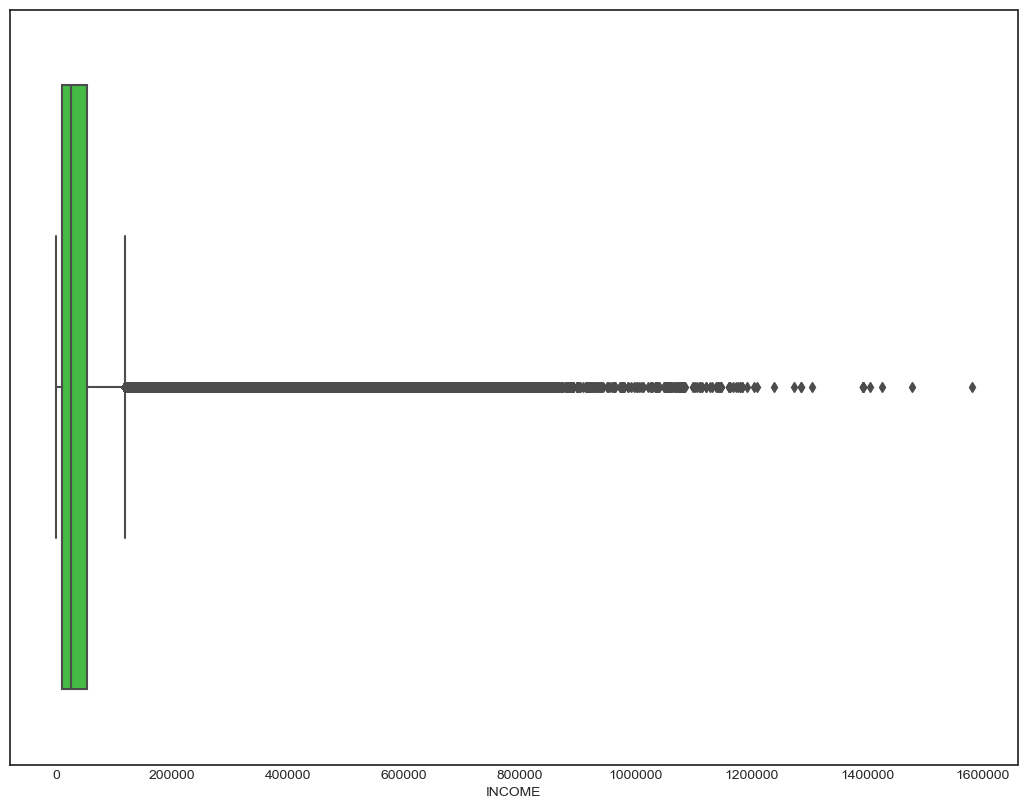

In [40]:
plt.figure(figsize=(13,10), dpi= 100)
sns.boxplot(x='INCOME', data=ACSeda, notch=False)

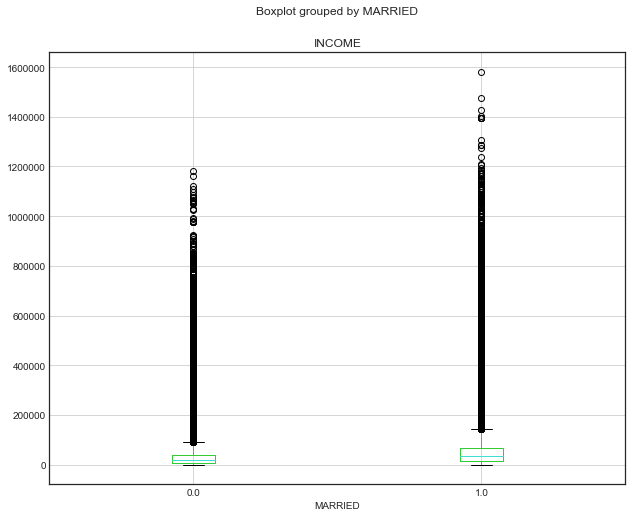

In [41]:
#Plotting between Income and Marrital Status
ACSeda.boxplot(column='INCOME', by='MARRIED', figsize= (10,8))

Marriage by Income and Sex

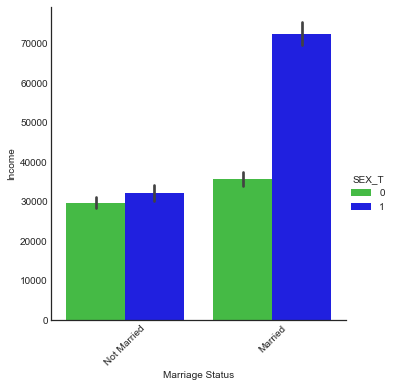

In [42]:
#this is illustrating mean by default
rs = sns.catplot(x="MARRIED", y="INCOME", hue="SEX_T", kind="bar", data=ACSeda.sample(12000));
rs.set_axis_labels("Marriage Status", "Income")
rs.set_xticklabels(["Not Married","Married"], rotation=45)

In [43]:
#First bin set using the 2019 federal guideline for poverty level for one-person household
ACSeda['INCOME_BIN'] = pd.cut(x=ACSeda['INCOME'], bins=[-1, 9999, 14999, 29999, 44999, 59999, 74999, 89999, 2000000], labels=['1', '2', '3', '4', '5', '6', '7', '8'])

In [44]:
ACSeda['INCOME_BIN'].value_counts(dropna=False) 

1    632820
3    496940
4    373355
8    276418
5    248653
2    222415
6    173672
7    106453
Name: INCOME_BIN, dtype: int64

In [45]:
pd.crosstab(ACSeda.INCOME_BIN, ACSeda.MARRIED, margins=True, dropna=False)

MARRIED,0.0,1.0,All
INCOME_BIN,,,
1,354571,278249,632820
2,120337,102078,222415
3,250346,246594,496940
4,157889,215466,373355
5,90044,158609,248653
6,56655,117017,173672
7,31953,74500,106453
8,64287,212131,276418
All,1126082,1404644,2530726


In [46]:
stack_income = pd.crosstab(ACSeda.INCOME_BIN, ACSeda.MARRIED)

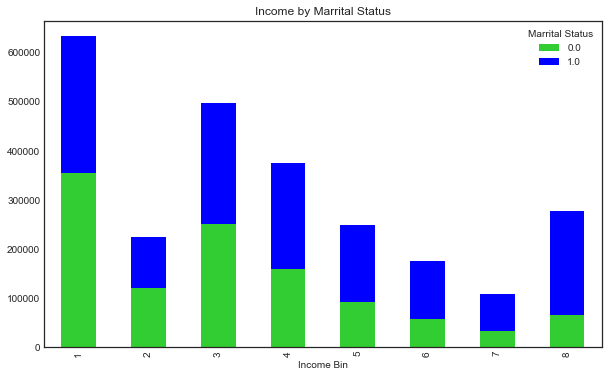

In [47]:
stack_income.plot.bar(stacked=True)
plt.legend(title="Marrital Status")
plt.title('Income by Marrital Status')
plt.xlabel('Income Bin')

fig = plt.gcf()
fig.set_size_inches(10,6)

plt.show()

# Visualizing Marriage

In [48]:
#by Race

ACSeda.loc[(ACSeda.HISP > 1), 'RACE'] = 'Hispanic' 
ACSeda.loc[(ACSeda.HISP ==1) & (ACSeda.RAC1P == 1), 'RACE'] = 'White'  
ACSeda.loc[(ACSeda.HISP ==1) & (ACSeda.RAC1P == 2), 'RACE'] = 'Black'
ACSeda.loc[(ACSeda.HISP ==1) & ((ACSeda.RAC1P == 3) | (ACSeda.RAC1P == 4) | (ACSeda.RAC1P == 5)), 'RACE'] = 'Nat_Am' 
ACSeda.loc[(ACSeda.HISP ==1) & ((ACSeda.RAC1P == 6) | (ACSeda.RAC1P == 7)), 'RACE'] = 'Asian' 
ACSeda.loc[(ACSeda.HISP ==1) & ((ACSeda.RAC1P == 8) | (ACSeda.RAC1P == 9)), 'RACE'] = 'Other'


In [49]:
ACSeda['RACE'].value_counts(dropna=False) 

White       1753887
Hispanic     325371
Black        242082
Asian        140712
Other         46518
Nat_Am        22156
Name: RACE, dtype: int64

In [50]:
ACSeda.groupby(['RACE', 'MARRIED']).size()

RACE      MARRIED
Asian     0.0          52059
          1.0          88653
Black     0.0         154421
          1.0          87661
Hispanic  0.0         157397
          1.0         167974
Nat_Am    0.0          12859
          1.0           9297
Other     0.0          26507
          1.0          20011
White     0.0         722839
          1.0        1031048
dtype: int64

In [51]:
stack_race = pd.crosstab(ACSeda.RACE, ACSeda.MARRIED)

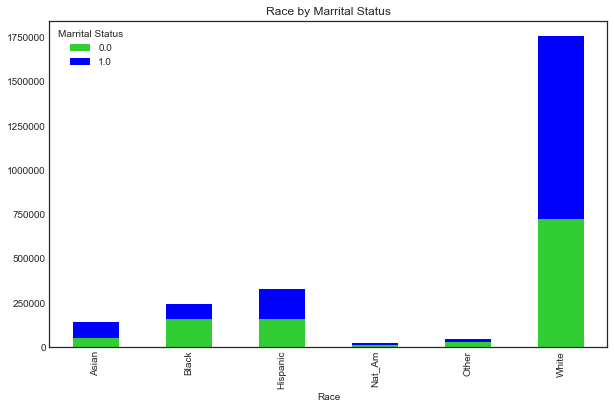

In [52]:
stack_race.plot.bar(stacked=True)
plt.legend(title="Marrital Status")
plt.title('Race by Marrital Status')
plt.xlabel('Race')
plt.yticks

fig = plt.gcf()
fig.set_size_inches(10,6)

plt.show()

In [53]:
#by Region/State
ACSeda.loc[(ACSeda.REGION ==1), 'RegionX'] = 'Northeast' 
ACSeda.loc[(ACSeda.REGION ==2), 'RegionX'] = 'Midwest' 
ACSeda.loc[(ACSeda.REGION ==3), 'RegionX'] = 'South' 
ACSeda.loc[(ACSeda.REGION ==4), 'RegionX'] = 'West' 
ACSeda.loc[(ACSeda.REGION ==5), 'RegionX'] = 'Puerto Rico'

In [54]:
ACSeda['RegionX'].value_counts(dropna=False) 

South        946578
West         589117
Midwest      541776
Northeast    453255
Name: RegionX, dtype: int64

In [55]:
ACSeda.groupby(['RegionX', 'MARRIED']).size()

RegionX    MARRIED
Midwest    0.0        236371
           1.0        305405
Northeast  0.0        208560
           1.0        244695
South      0.0        416513
           1.0        530065
West       0.0        264638
           1.0        324479
dtype: int64

In [56]:
stack_region = pd.crosstab(ACSeda.RegionX, ACSeda.MARRIED)

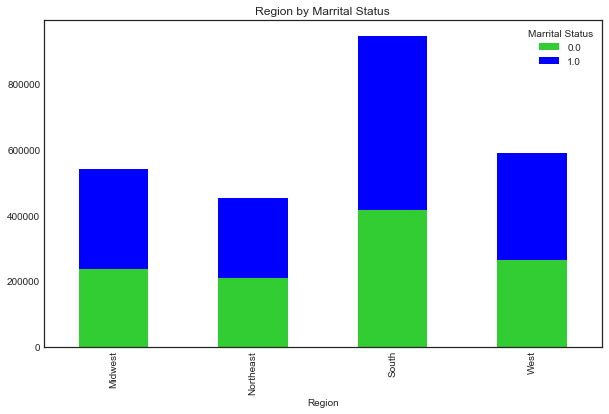

In [57]:
stack_region.plot.bar(stacked=True)
plt.legend(title="Marrital Status")
plt.title('Region by Marrital Status')
plt.xlabel('Region')
colors = "winter"


fig = plt.gcf()
fig.set_size_inches(10,6)

plt.show()

# Marrital Status by State

In [58]:
# ACSeda['ST'].value_counts(dropna=False) 

In [59]:
ACSeda['STATE'] = ACSeda['ST'].astype(str)

vals_to_replace = {1: 'Alabama/AL', 2: 'Alaska/AK', 4: 'Arizona/AZ', 5: 'Arkansas/AR', 6: 'California/CA', 8: 'Colorado/CO',
                   9: 'Connecticut/CT', 10: 'Delaware/DE', 11: 'District of Columbia/DC', 12: 'Florida/FL', 13: 'Georgia/GA',
                   15: 'Hawaii/HI', 16: 'Idaho/ID', 17: 'Illinois/IL', 18: 'Indiana/IN', 19: 'Iowa/IA', 20: 'Kansas/KS',
                   21: 'Kentucky/KY', 22: 'Louisiana/LA', 23: 'Maine/ME', 24: 'Maryland/MD', 25: 'Massachusetts/MA',
                   26: 'Michigan/MI', 27: 'Minnesota/MN', 28: 'Mississippi/MS', 29: 'Missouri/MO', 30: 'Montana/MT',
                   31: 'Nebraska/NE', 32: 'Nevada/NV', 33: 'New Hampshire/NH', 34: 'New Jersey/NJ', 35: 'New Mexico/NM',
                   36: 'New York/NY', 37: 'North Carolina/NC', 38: 'North Dakota/ND', 39: 'Ohio/OH', 40: 'Oklahoma/OK',
                   41: 'Oregon/OR', 42: 'Pennsylvania/PA', 44: 'Rhode Island/RI', 45: 'South Carolina/SC', 46: 'South Dakota/SD',
                   47: 'Tennessee/TN', 48: 'Texas/TX', 49: 'Utah/UT', 50: 'Vermont/VT', 51: 'Virginia/VA', 53: 'Washington/WA',
                   54: 'West Virginia/WV', 55: 'Wisconsin/WI', 56: 'Wyoming/WY', 72: 'Puerto Rico/PR'}

ACSeda['STATE'] = ACSeda['ST'].map(vals_to_replace)

In [60]:
ACSeda['STATE'].value_counts(dropna=False) 

California/CA              298092
Texas/TX                   203761
Florida/FL                 164612
New York/NY                158390
Pennsylvania/PA            103225
Illinois/IL                100154
Ohio/OH                     94690
North Carolina/NC           80882
Michigan/MI                 79356
Georgia/GA                  78402
New Jersey/NJ               70138
Virginia/VA                 67020
Washington/WA               59184
Massachusetts/MA            56799
Arizona/AZ                  54161
Tennessee/TN                53220
Indiana/IN                  52556
Missouri/MO                 48826
Maryland/MD                 47478
Wisconsin/WI                47026
Colorado/CO                 43772
Minnesota/MN                43021
South Carolina/SC           39812
Alabama/AL                  38360
Kentucky/KY                 35712
Louisiana/LA                34919
Oregon/OR                   33320
Connecticut/CT              29028
Oklahoma/OK                 28480
Iowa/IA       

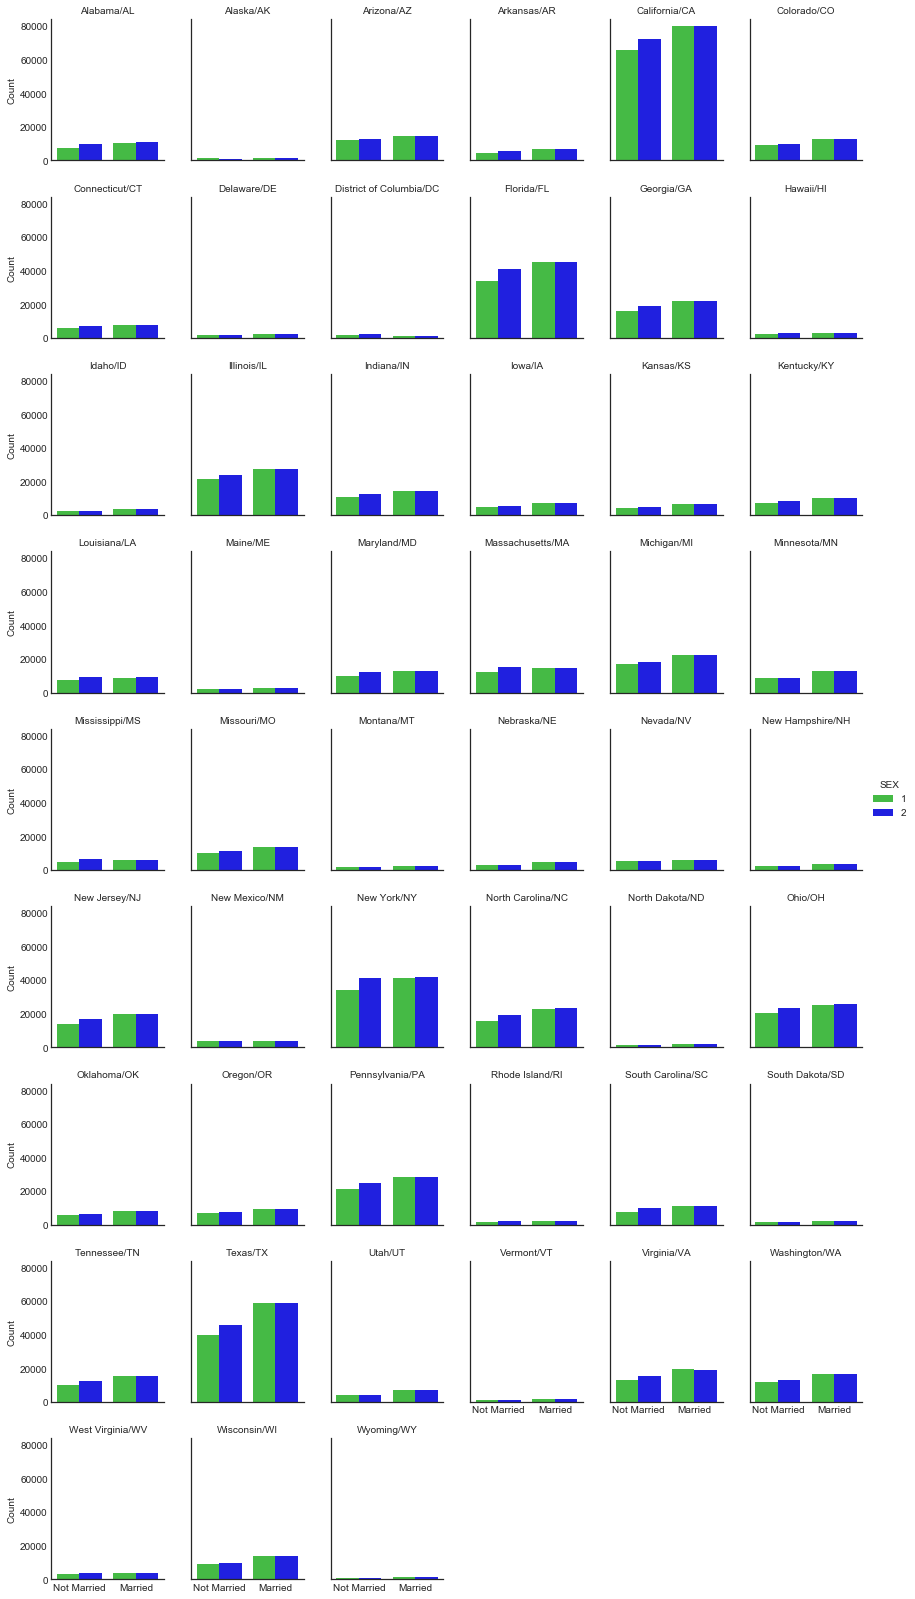

In [61]:
g = sns.catplot('MARRIED', hue='SEX', col='STATE', col_wrap=6,\
                data=ACSeda, kind='count',\
                height=2.5, aspect=.8)

g.set_axis_labels("", "Count").set_xticklabels(['Not Married', 'Married']).set_titles('{col_name}')

# Scatterplots and Feature Selection

In [62]:
list(ACSeda)

['Unnamed: 0_x',
 'Unnamed: 0.1',
 'RT_x',
 'SERIALNO',
 'DIVISION',
 'SPORDER',
 'PUMA',
 'REGION',
 'ST',
 'ADJINC',
 'PWGTP',
 'AGEP',
 'CIT',
 'COW',
 'JWMNP',
 'JWTR',
 'MAR',
 'MARHT',
 'MIG',
 'MIL',
 'PAP',
 'RELP',
 'SCHL',
 'SEX',
 'WAGP',
 'WKHP',
 'WRK',
 'DIS',
 'DRIVESP',
 'ESR',
 'FOD1P',
 'HICOV',
 'HISP',
 'JWAP',
 'JWDP',
 'MIGPUMA',
 'MSP',
 'NAICSP',
 'NATIVITY',
 'OC',
 'OCCP',
 'PAOC',
 'PERNP',
 'PINCP',
 'RAC1P',
 'SOCP',
 'FHISP',
 'PUMA_T',
 'ST_T',
 'GEOID',
 'duplicate',
 'data_key_T',
 'MARRIED',
 'WAGES',
 'INCOME',
 'EARN',
 'CITIZEN',
 'MAR_TIMES',
 'MOVER',
 'EDUCATION',
 'WORK_SOC',
 'SEX_T',
 'ESR_T',
 'NATIVITY_T',
 'HEALTH',
 'DIS_T',
 'HISPANIC',
 'WHITE',
 'BLACK',
 'INDIAN',
 'ASIAN',
 'OTHER',
 'Unnamed: 0_y',
 'RT_y',
 'TYPE',
 'marital_status_house',
 'FACCESSP',
 'FBROADBNDP',
 'FSMARTPHONP',
 'FVEHP',
 'family',
 'multigen',
 'language',
 'FAMILY',
 'MULTIGEN',
 'ENGLISH',
 'OCC_BUS',
 'OCC_CMM',
 'OCC_CMS',
 'OCC_CON',
 'OCC_EAT',
 'OCC_EDU

In [63]:
ACSproject = ACSeda.filter(items=['SERIALNO', 'SPORDER', 'PUMA', 'REGION','ST', 'CIT','PUMA_T','ST_T','GEOID','MARRIED',
                                  'CITIZEN','MAR_TIMES','MOVER','EDUCATION','WORK_SOC','SEX_T','ESR_T','NATIVITY_T','HEALTH',
                                  'DIS_T','HISPANIC','WHITE','BLACK','INDIAN','ASIAN','OTHER', 'AGE_BIN', 'INCOME_BIN','OCC_BUS', 
                                  'OCC_CMM','OCC_CMS','OCC_CON', 'OCC_EAT', 'OCC_EDU','OCC_ENG', 'OCC_ENT', 'OCC_EXT', 'OCC_FFF',
                                  'OCC_FIN', 'OCC_HLS', 'OCC_LGL', 'OCC_MED', 'OCC_MGR', 'OCC_MIL','OCC_OFF', 'OCC_PRD', 
                                  'OCC_PRS', 'OCC_PRT', 'OCC_RPR', 'OCC_SAL', 'OCC_SCI', 'OCC_TRN', 'OCC_UNE', 'FAMILY',
                                  'MULTIGEN','ENGLISH', 'PWGTP'])        

In [64]:
type(ACSproject)

pandas.core.frame.DataFrame

In [65]:
ACSproject.shape

(2530726, 57)

In [66]:
#Correlation Matrix
corr = ACSproject.corr(method='pearson', min_periods=1)
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

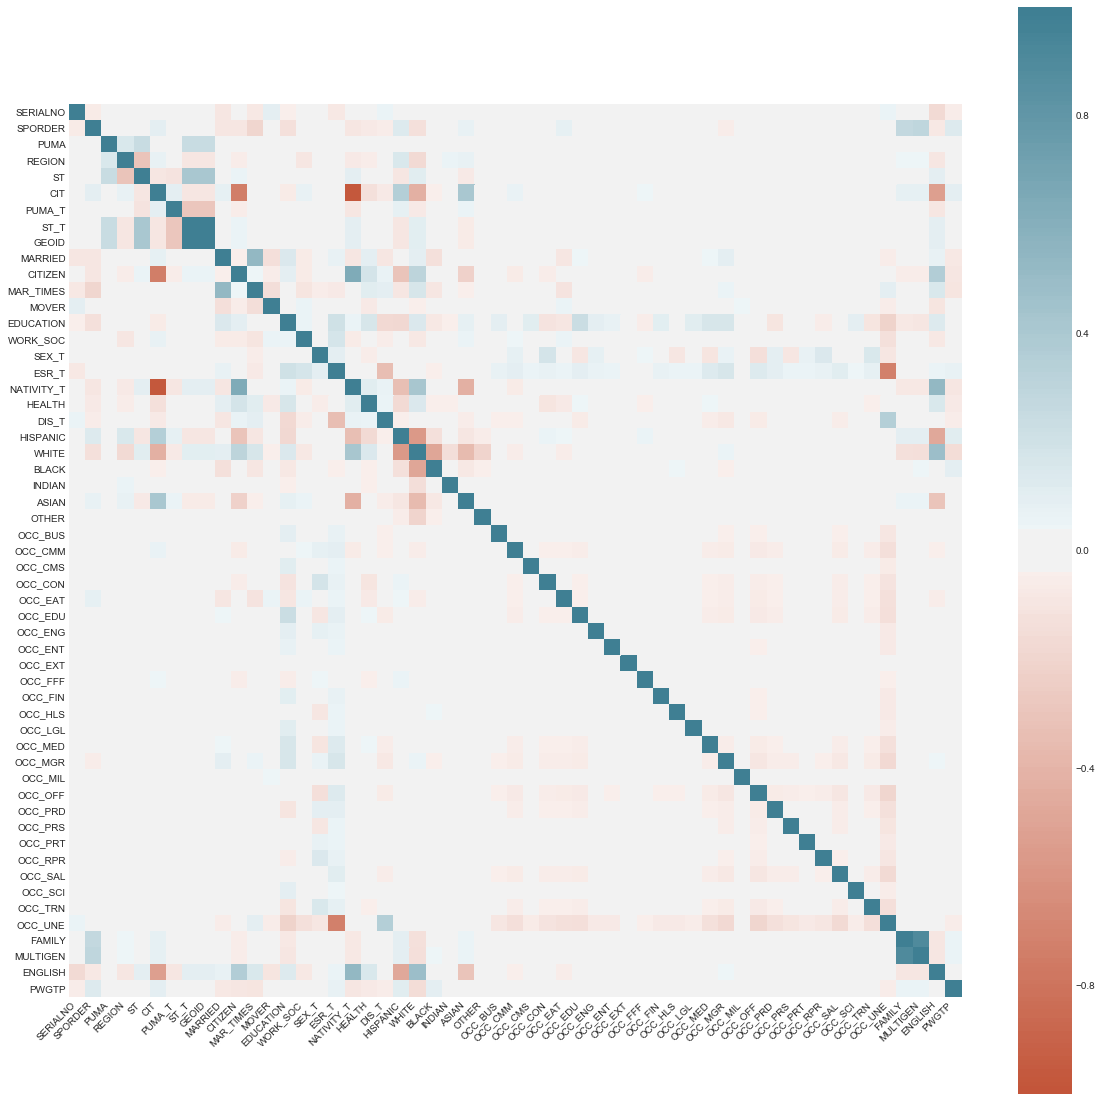

In [67]:
#HeatMap
corr = ACSproject.corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
    
);


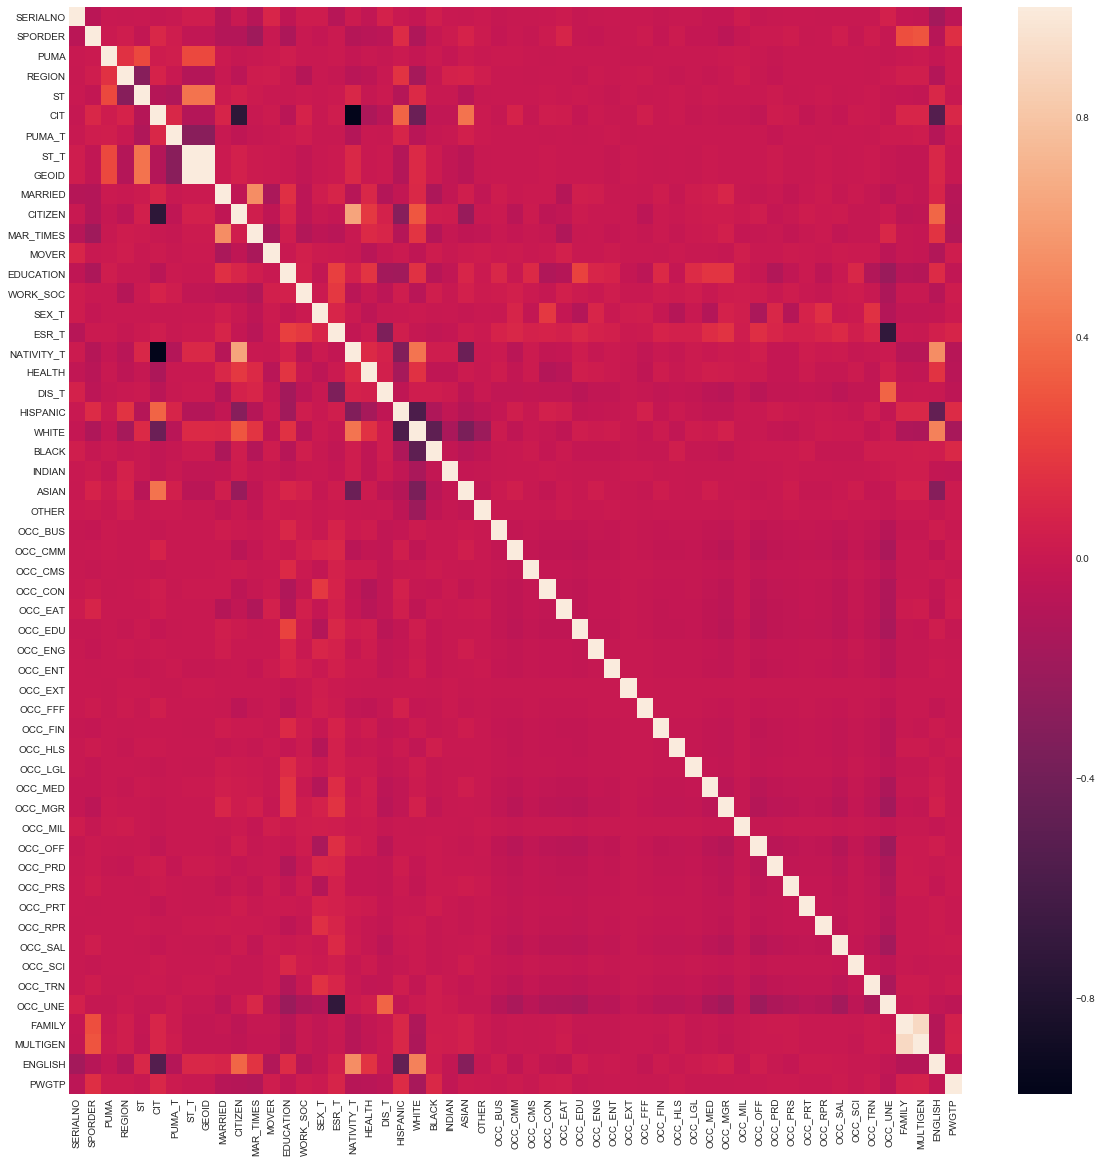

In [68]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(ACSproject.corr(), ax=ax)
plt.show()

In [69]:
ACSproject.to_csv(r'data/ACSproject.csv') 

In [70]:
#End of Code